In [31]:
# standard imports
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
import warnings

pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [32]:
# Fetching the ITC stock data from yfinance library for the past 10 years
start = dt.datetime(2010,1,1).date()
end = dt.datetime(2020,12,31).date()
ITC = yf.download('ITC.NS',start,end)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [33]:
daily_data = ITC.copy().round(4)

In [34]:
daily_data.head(5)

,Adj Close
Date,
2010-01-04 00:00:00+05:30,61.3640
2010-01-05 00:00:00+05:30,61.9688
2010-01-06 00:00:00+05:30,62.1140
2010-01-07 00:00:00+05:30,61.9204
2010-01-08 00:00:00+05:30,62.0535


In [35]:
# Calculating daily Log returns
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)

# Taking a peek at the fetched data
daily_data.head(5)

,Adj Close,daily_return
Date,,
2010-01-05 00:00:00+05:30,61.9688,0.009808
2010-01-06 00:00:00+05:30,62.1140,0.002340
2010-01-07 00:00:00+05:30,61.9204,-0.003122
2010-01-08 00:00:00+05:30,62.0535,0.002147
2010-01-11 00:00:00+05:30,62.0777,0.000390


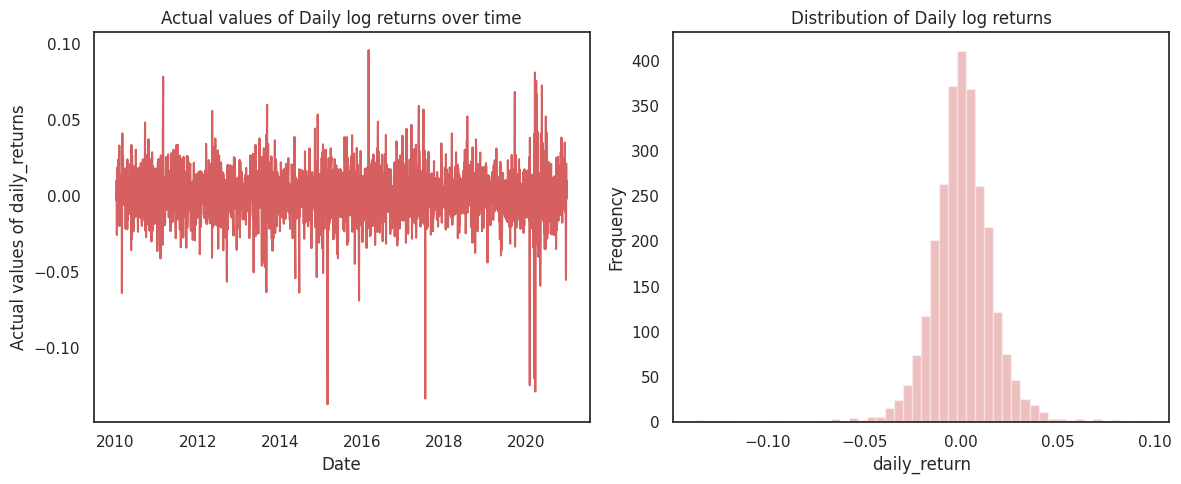

In [36]:
# Visualizing the daily log returns
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# Plot a simple histogram with binsize determined automatically
sns.lineplot(daily_data['daily_return'], color="r")
plt.ylabel('Actual values of daily_returns')
plt.title('Actual values of Daily log returns over time')

plt.subplot(1,2,2)
# Plot a simple histogram with binsize determined automatically
sns.distplot(daily_data['daily_return'], kde=False, color="r")
plt.ylabel('Frequency')


plt.tight_layout()
plt.title('Distribution of Daily log returns')

plt.show();